<a href="https://colab.research.google.com/github/mariaclaraseixa/ai4i-datascience/blob/main/projeto_final_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pergunta de Negócio

Estou fazendo pesquisas relacionadas a ciência dos materiais e nesse contexto acabei tendo a oportunidade de participar de aulas experimentais no laboratório de ciência dos materiais onde se estuda muito sobre falha, fadiga e fluência, etc . Isso se aplica tanto para máquinas quanto para objetos como aviões, prédios e carros, por exemplo. No contexto de engenharia, é extremamente importante considerar esse estudo, por isto o projeto será voltado para aplicação de Machine Learning e Data Science no âmbito acadêmico e profissional de engenharia dos materiais, onde iremos considerar a  falha inesperada dos materiais que é um grande desafio na indústria.

O dataset AI4I (AI for Industry) do Kaggle contém dados industriais usados para prever falhas em máquinas. Ele se relaciona com Ciência dos Materiais porque muitos dos fatores que levam a falhas ou desgaste estão diretamente ligados às propriedades dos materiais. Ao analisar esse conjunto de dados, a IA ajuda a entender como temperatura, pressão, vibração e carga afetam o comportamento dos materiais durante o uso.
Assim, o AI4I permite estudar como materiais se degradam, como surgem defeitos, como diferentes condições operacionais aceleram falhas e como prever o fim da vida útil de componentes. Isso conecta o dataset à Ciência dos Materiais, pois os modelos de IA aprendem padrões que dependem da resistência, dureza, fadiga, condutividade térmica e outras propriedades dos materiais usados nos equipamentos industriais.

A ideia é que a manutenção preditiva consiga antecipar falhas antes que aconteçam e iremos usar dados provenientes de sensores e históricos de operação para isto. O dataset AI4I 2020 Predictive Maintenance simula condições reais de operação de máquinas, registrando variáveis como carga, potência, vibração, desgaste e modos de falha.

A pergunta de negócio é **“Com base nos dados operacionais das máquinas, é possível prever se uma máquina irá falhar e qual o tipo de falha, de modo a antecipar manutenções e evitar interrupções no processo produtivo?”**

**O objetivo do modelo é fazer uma classificação capaz de prever se uma máquina irá falhar (binário) com base em suas condições de operação e variáveis de processo**. O modelo busca apoiar estratégias de manutenção preditiva, permitindo reduzir paradas inesperadas, otimizar a produção e diminuir custos operacionais.

# IMPORTS

In [21]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# Carregamento dos dados

O dataset utilizado neste projeto é o **AI4I 2020 Predictive Maintenance Dataset**, disponibilizado publicamente na plataforma Kaggle pelo autor *Stephan Matzka*. O conjunto de dados foi carregado diretamente via biblioteca kagglehub, que permite acessar datasets hospedados no Kaggle de forma automatizada.
https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/code

In [22]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ai4i2020.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "stephanmatzka/predictive-maintenance-dataset-ai4i-2020",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


/tmp/ipython-input-2084284958.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'predictive-maintenance-dataset-ai4i-2020' dataset.


# ETL

Primeiro, conferimos a estrutura do dataset, validando os nomes das colunas, tipos de dados (numéricos e categóricos) e características gerais. Em seguida, verificamos a presença de valores ausentes e linhas duplicada, nenhuma remoção foi necessária, pois não havia dados faltantes e nem duplicados.
As variáveis categóricas foram convertidas para o tipo category, preparando-as para a etapa de codificação. Depois, analisamos outliers por meio de boxplots e aplicamos o método IQR (Interquartile Range) para removê-los, garantindo maior estabilidade nos modelos.

In [23]:
print("Primeiras 5 linhas:", df.head())

Primeiras 5 linhas:    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0 

In [24]:
import pandas as pd
print("Informações gerais do dataset:")
df.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64

In [25]:
print("\n Estatísticas Descritivas:")
display(df.describe())


 Estatísticas Descritivas:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [26]:
# 1. Contar quantos valores ausentes existem em cada coluna
print("\n--- Contagem de valores ausentes por coluna: ---\n")
print(df.isnull().sum())



--- Contagem de valores ausentes por coluna: ---

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [27]:
# 2. Verificar se existem linhas duplicadas
duplicatas = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas encontradas: {duplicatas}")



Número de linhas duplicadas encontradas: 0


In [28]:
# transformar colunas categóricas para tipo 'category'
cat_cols = ['Type']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [29]:
# 4. IDENTIFICAÇÃO DE OUTLIERS — MÉTODO IQR

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

def detectar_outliers_IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR

    outliers = df[(df[col] < low) | (df[col] > high)]
    return outliers

print("\nQuantidade de outliers por variável:")
for col in numeric_cols:
    outliers = detectar_outliers_IQR(df, col)
    print(f"{col}: {len(outliers)} outliers")



Quantidade de outliers por variável:
UDI: 0 outliers
Air temperature [K]: 0 outliers
Process temperature [K]: 0 outliers
Rotational speed [rpm]: 418 outliers
Torque [Nm]: 69 outliers
Tool wear [min]: 0 outliers
Machine failure: 339 outliers
TWF: 46 outliers
HDF: 115 outliers
PWF: 95 outliers
OSF: 98 outliers
RNF: 19 outliers


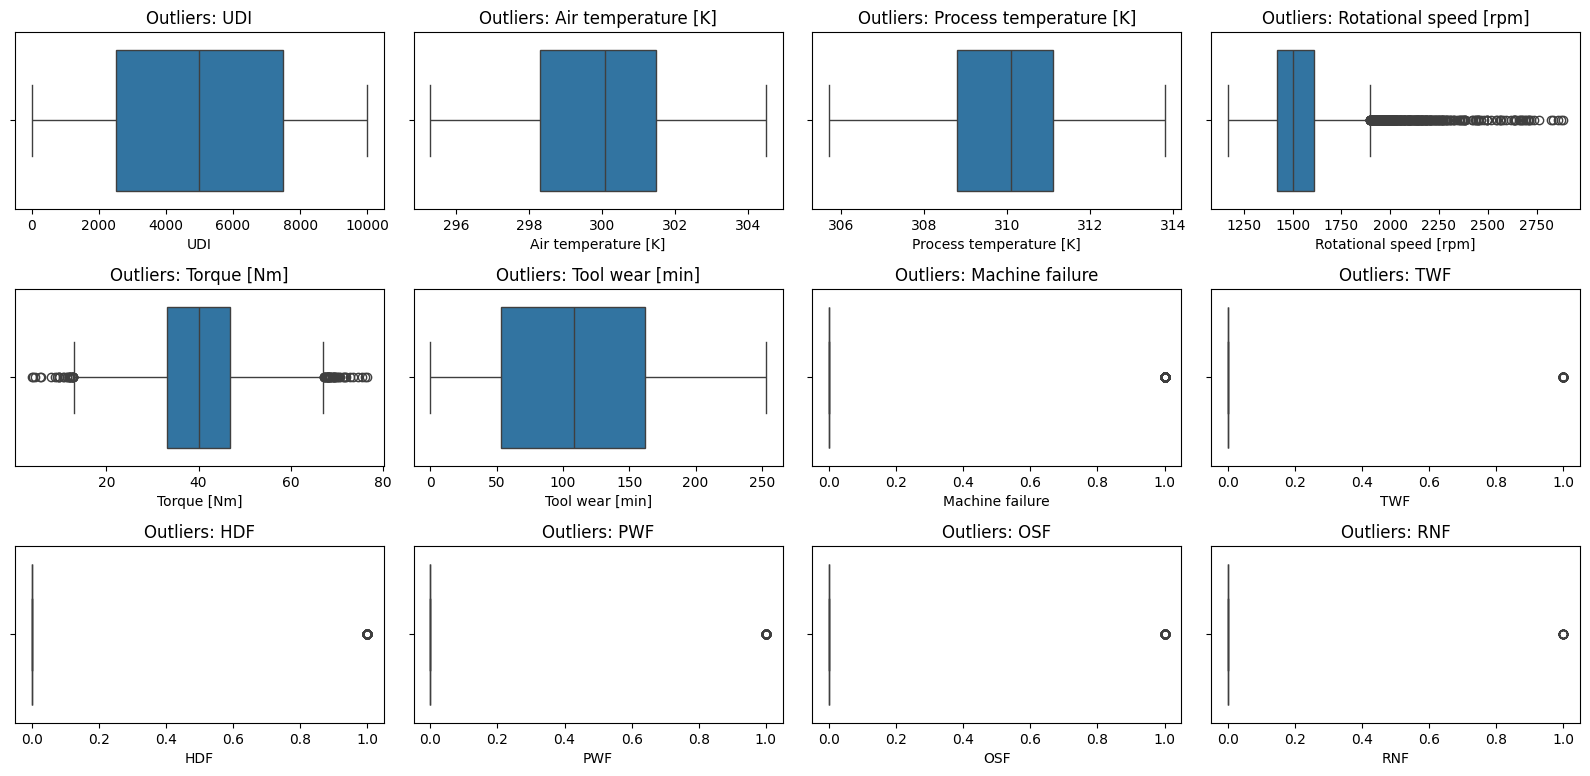

In [30]:
# Boxplots para visualização
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers: {col}")
plt.tight_layout()
plt.show()

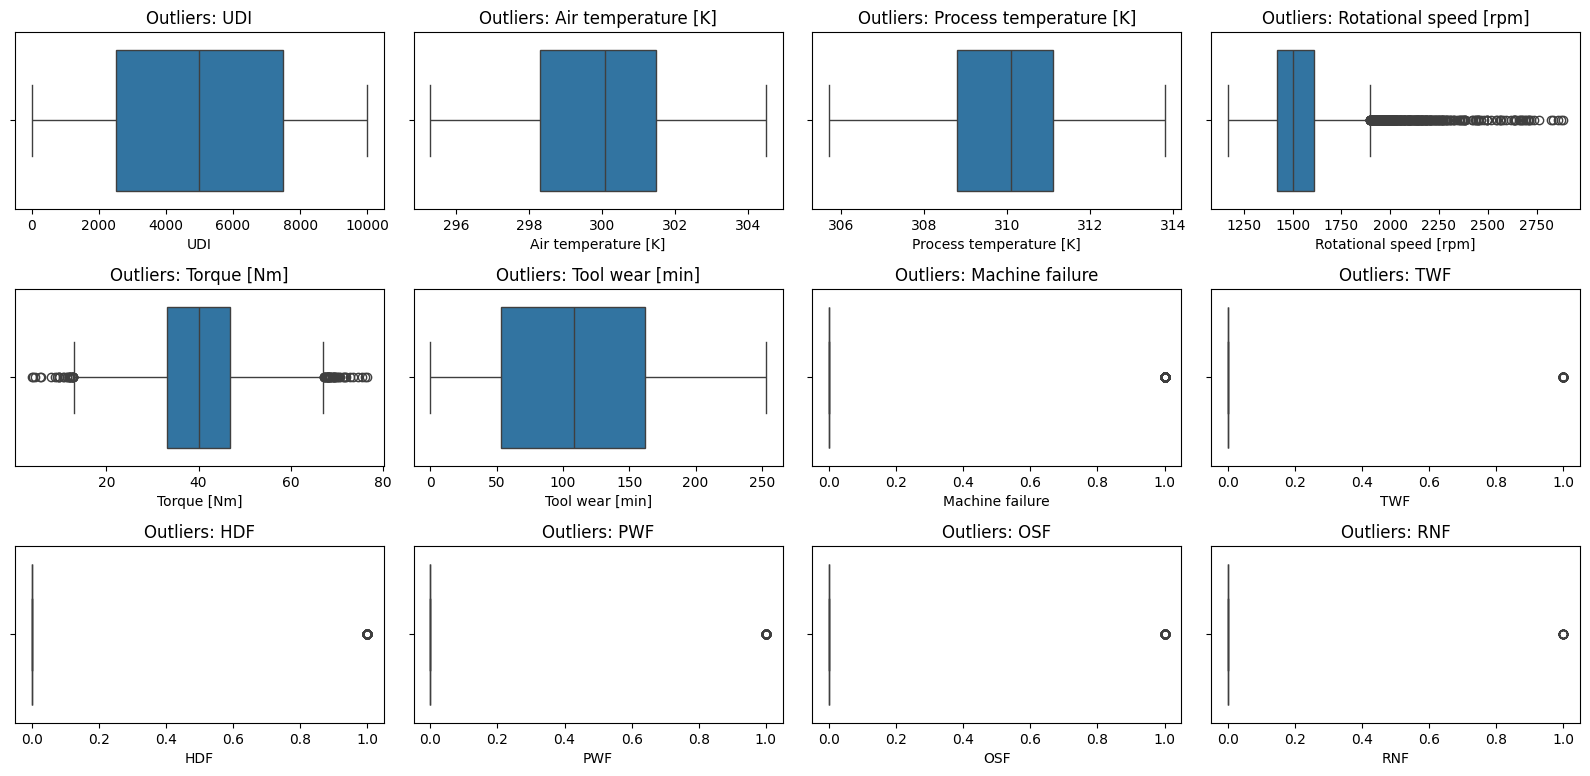

In [31]:
# Remoção Outliers
def flag_outliers_iqr(df, cols, groupby=None, k=1.5):
    """
    Marca outliers usando IQR. Não remove — apenas cria coluna boolean: {col}_outlier_iqr
    groupby: coluna para aplicar o IQR por grupo (ex: 'machine_id') ou None para global.
    """
    df = df.copy()
    if groupby:
        def mark(g):
            for c in cols:
                q1 = g[c].quantile(0.25)
                q3 = g[c].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - k * iqr
                upper = q3 + k * iqr
                g[f'{c}_outlier_iqr'] = ((g[c] < lower) | (g[c] > upper))
            return g
        df = df.groupby(groupby).apply(mark).reset_index(drop=True)
    else:
        for c in cols:
            q1 = df[c].quantile(0.25)
            q3 = df[c].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - k * iqr
            upper = q3 + k * iqr
            df[f'{c}_outlier_iqr'] = ((df[c] < lower) | (df[c] > upper))
    return df

def clip_by_quantile(df, cols, lower_q=0.01, upper_q=0.99):
    """
    Clippa valores pela quantilização. Retorna df modificado.
    """
    df = df.copy()
    for c in cols:
        low = df[c].quantile(lower_q)
        high = df[c].quantile(upper_q)
        df[c] = df[c].clip(lower=low, upper=high)
    return df

    # Boxplots para visualização
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers: {col}")
plt.tight_layout()
plt.show()

# EDA

A EDA permitiu compreender o comportamento das variáveis do dataset AI4I e identificar quais delas são relevantes para prever falhas de máquina. Os histogramas mostraram que as variáveis operacionais (temperaturas, torque, velocidade e desgaste da ferramenta) possuem distribuições estáveis e coerentes com o processo industrial, indicando que são bons candidatos a preditores. E tambem UDI é apenas um identificador e não agrega valor ao modelo, por isto descartei no próximo passo!!!



O heatmap mostrou relações conhecidas do processo, como a forte correlação entre torque e velocidade, e entre as temperaturas do ar e do processo. Apesar disso, todas as variáveis foram mantidas, pois podem contribuir conjuntamente para padrões de falha. Além disso, a EDA revelou um forte desbalanceamento no alvo (“machine failure”), com cerca de 1% de falhas, reforçando a necessidade de técnicas específicas como class weights ou oversampling.

**RESUMINDO: A EDA foi importante para selecionar variáveis, identificar redundâncias e  entender o desbalanceamento do alvo, alem de orientar a preparação adequada dos dados para o modelo de classificação binária de falhas.**

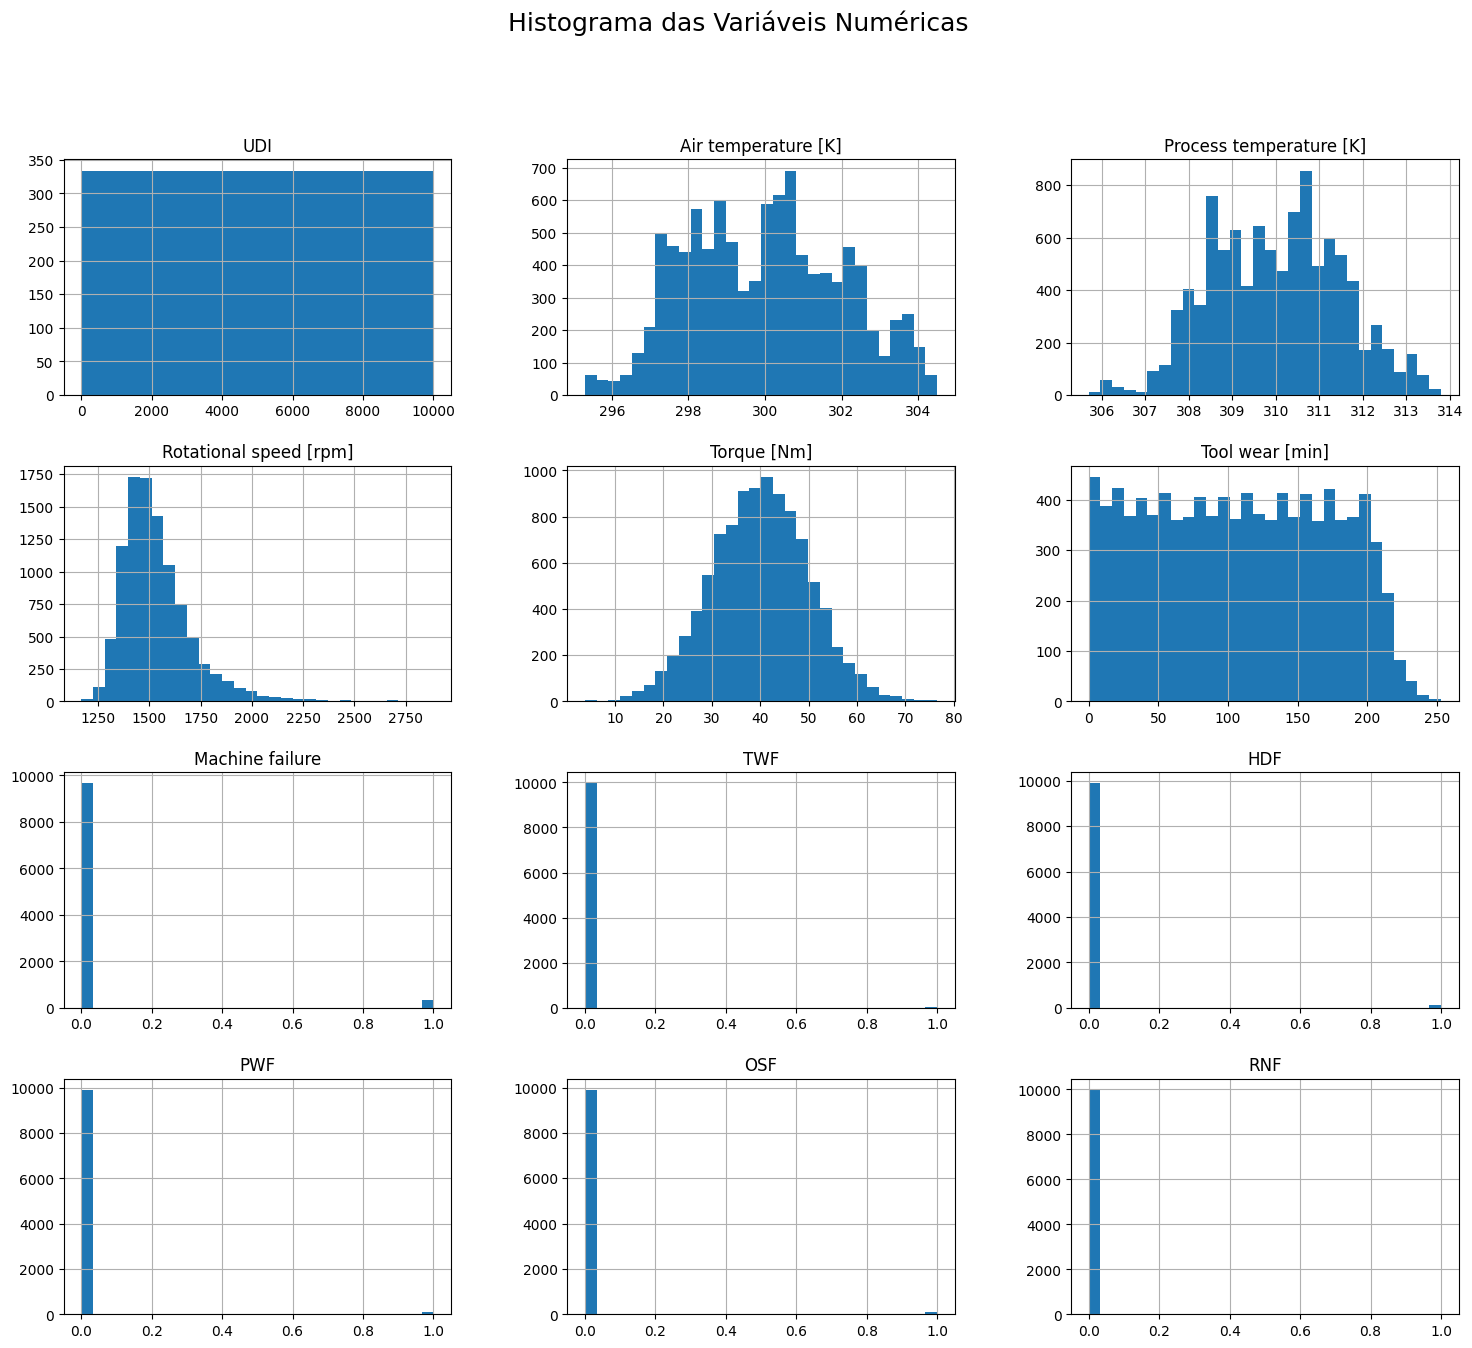

In [32]:
# HISTOGRAMAS DAS VARIÁVEIS NUMÉRICAS

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols].hist(figsize=(18, 15), bins=30)
plt.suptitle("Histograma das Variáveis Numéricas", fontsize=18)
plt.show()

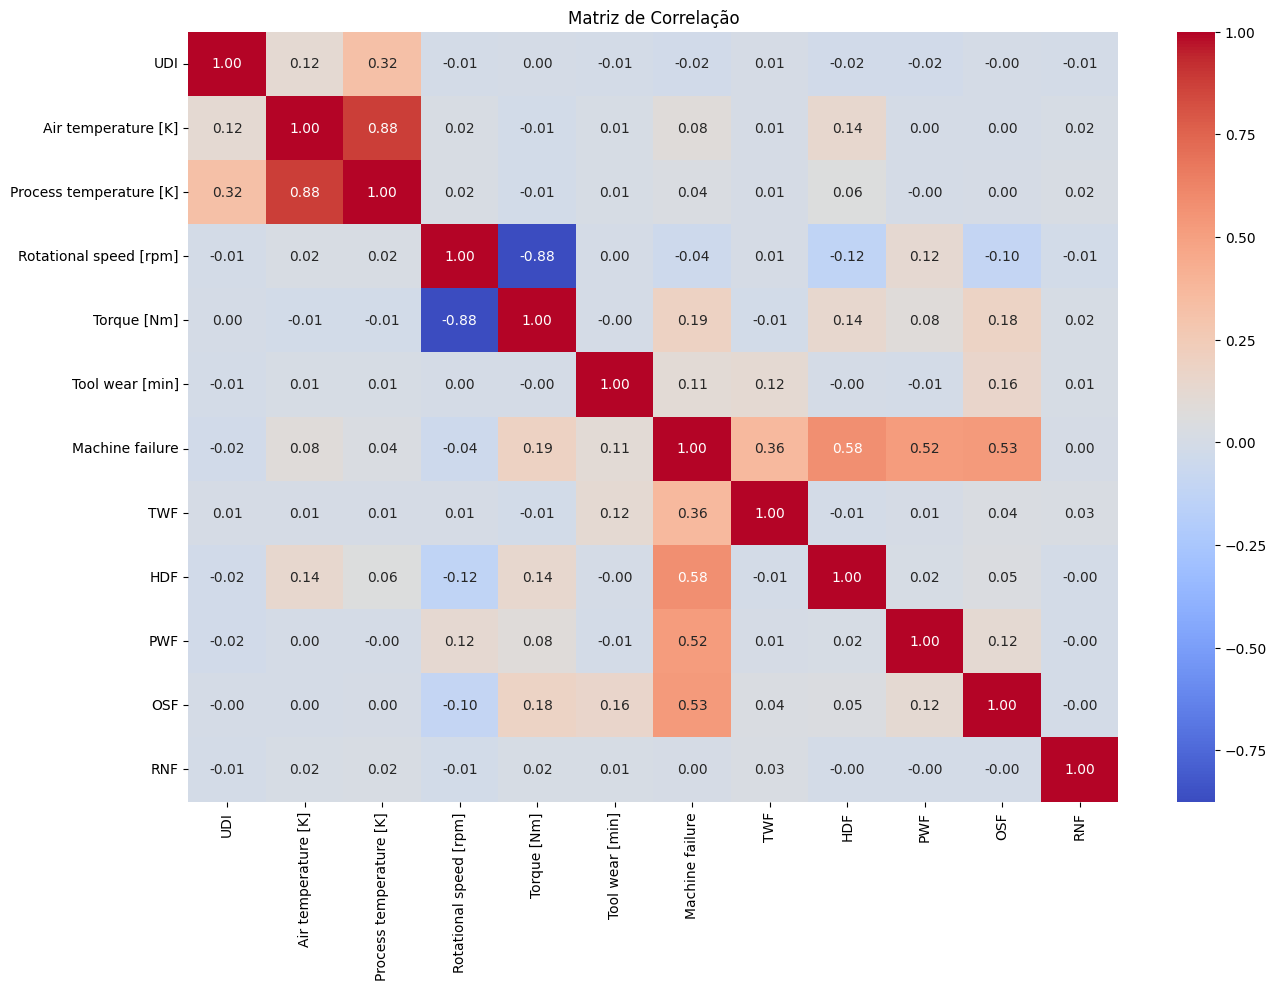

In [33]:
# MATRIZ DE CORRELAÇÃO

plt.figure(figsize=(15, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# SELEÇÃO DE FEATURES

Os dados foram preparados separando-se features e target, aplicando **One-Hot Encoding** para transformar variáveis categóricas em numéricas e realizando o train-test split (75% treino, 25% teste). Para modelos sensíveis à escala, aplicou-se **padronização** (StandardScaler).


Um modelo **Random Forest** foi usado para medir a importância das variáveis. As features mais relevantes foram principalmente os tipos de falha (HDF, OSF, PWF, TWF) e variáveis operacionais como torque, velocidade, desgaste e temperaturas.


In [34]:
# SEPARANDO FEATURES E TARGET
target = "Machine failure"

# Remover colunas que não são úteis
df = df.drop(columns=["UDI", "Product ID"])


# SEPARAÇÃO ENTRE FEATURES E TARGET

X = df.drop(columns=[target])
y = df[target]

# Dummies (caso haja colunas categóricas)
X = pd.get_dummies(X, drop_first=True)


In [35]:

# TRAIN-TEST SPLIT


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)



In [36]:
# PADRONIZAÇÃO (necessário para Logistic e SVM/KNN)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# SELEÇÃO DE FEATURES — RANDOM FOREST

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nTop 10 features mais importantes:")
print(importances.head(10))




Top 10 features mais importantes:
HDF                        0.280534
OSF                        0.216460
PWF                        0.177086
TWF                        0.111575
Torque [Nm]                0.069978
Rotational speed [rpm]     0.065972
Tool wear [min]            0.032527
Air temperature [K]        0.024248
Process temperature [K]    0.017215
Type_M                     0.002100
dtype: float64


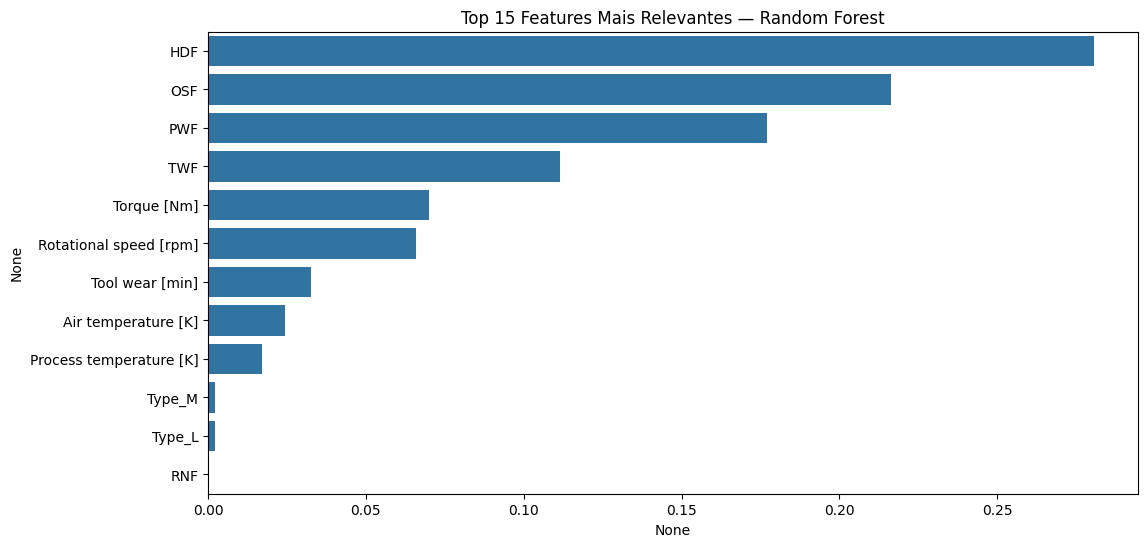

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 Features Mais Relevantes — Random Forest")
plt.show()

# TREINAMENTO DOS 3 MODELOS

**MODELO ESCOLHIDO: RANDOM FOREST**

baseado no objetivo de detectar o máximo possível de falhas (alto recall) sem gerar alarmes desnecessários, o Random Forest é a melhor escolha. Ele combina ótimo desempenho, robustez e capacidade de capturar relações não lineares dos dados operacionais.

METRICAS


- Acurácia: proporção de previsões corretas (pouco confiável em dados desbalanceados).
- Precisão: percentual de acertos entre as previsões de falha (evita falsos alarmes).
- Recall: capacidade de identificar todas as falhas reais (falhas não detectadas podem gerar paradas e custos elevados - CUIDADO)
- F1-Score: equilíbrio entre precisão e recall (ideal para avaliar desempenho em classes raras).

Foram treinados três modelos: Regressão Logística, Árvore de Decisão e Random Forest. Cada modelo foi treinado com o conjunto de treino e avaliado no conjunto de teste usando as métricas acima. Importante ressaltar que a Regressão Logística utilizou dados padronizados e as Árvores utilizaram dados originais.

A Regressão Logística e o Random Forest tiveram o melhor desempenho geral, com F1-Score igual a 0.9859 e recall elevado, mostrando excelente capacidade de detectar falhas sem aumentar falsos positivos.
A Árvore de Decisão teve desempenho inferior, especialmente em precisão

In [39]:


# TREINAMENTO DOS 3 MODELOS

models = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {
    "Modelo": [],
    "Acurácia": [],
    "Precisão": [],
    "Recall": [],
    "F1-Score": []
}

In [40]:
# AVALIAÇÃO DOS MODELOS

for name, model in models.items():

    # usar dados padronizados quando fizer sentido
    if name == "Regressão Logística":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # salvar resultados
    results["Modelo"].append(name)
    results["Acurácia"].append(acc)
    results["Precisão"].append(prec)
    results["Recall"].append(rec)
    results["F1-Score"].append(f1)

In [41]:

# TABELA FINAL COMPARATIVA

df_results = pd.DataFrame(results)
df_results.sort_values(by="F1-Score", ascending=False, inplace=True)
print("RESULTADOS COMPARATIVOS")
print(df_results)

RESULTADOS COMPARATIVOS
                Modelo  Acurácia  Precisão    Recall  F1-Score
0  Regressão Logística    0.9992  1.000000  0.972222  0.985915
2        Random Forest    0.9992  1.000000  0.972222  0.985915
1    Árvore de Decisão    0.9968  0.921053  0.972222  0.945946


# DEPLOY

Após treinar o modelo, ele foi salvo com joblib para permitir seu uso em produção.


Foi fornecido um novo conjunto de medições de uma máquina, com:
temperatura do ar, temperatura do processo, velocidade de rotação, torque,	desgaste da ferramenta e tipo de falha potencial (one-hot encoded).

A previsão sobre uma nova máquina usando o modelo feito antes, com um conjunto que tem características previamente não vistas pelo algoritmo. O modelo Random Forest estimou que há uma probabilidade de 88% de que essa máquina venha a falhar. Portanto, seria recomendado manutenção preventiva para evitar esse desafio da industria.

In [42]:
# SALVANDO O MODELO FINAL (Random Forest) + SCALER

import joblib

# salvar modelo
joblib.dump(rf, 'modelo_final.pkl')

# salvar scaler (mesmo que RF não use diretamente, pode ser útil para deploy)
joblib.dump(scaler, 'scaler.pkl')

print("Modelo e scaler salvos com sucesso!")

Modelo e scaler salvos com sucesso!


In [45]:
# CARREGANDO O MODELO E O SCALER

import joblib
import numpy as np
import pandas as pd

# carregar modelo salvo
modelo = joblib.load('modelo_final.pkl')
scaler = joblib.load('scaler.pkl')

print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


In [46]:
# criei um novo conjunto de dados e apliquei o modelo
novo_dado = pd.DataFrame({
    "Air temperature [K]": [305],
    "Process temperature [K]": [315],
    "Rotational speed [rpm]": [1500],
    "Torque [Nm]": [40],
    "Tool wear [min]": [150],
    "TWF": [0],
    "HDF": [0],
    "PWF": [1],
    "OSF": [0],
    "RNF": [0]
})

In [47]:
# random forest n precisa de scaler
# Garantir que as colunas estão na mesma ordem do treinamento
novo_dado = novo_dado.reindex(columns=X.columns, fill_value=0)

# Fazer previsão
pred = modelo.predict(novo_dado)[0]
prob = modelo.predict_proba(novo_dado)[0][1]

print("Previsão:", pred)
print("Probabilidade de falha:", round(prob * 100, 2), "%")


Previsão: 1
Probabilidade de falha: 88.0 %
